**How does K-NN works?**

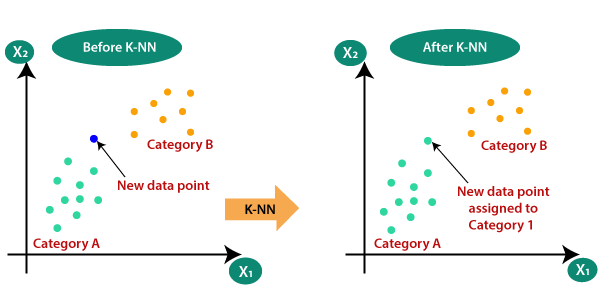

**Predicting iPhone sales using K-NN algorithm**

Aim is to predict if the customer will purchase an iPhone or not given their gender, age and salary using K-NN algorithm.

**Import necessary librabries and load data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("iphone_purchase_records.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
dataset.drop('Gender', axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   Salary           400 non-null    int64
 2   Purchase Iphone  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
X=dataset.drop('Purchase Iphone', axis=1).values
Y=dataset['Purchase Iphone'].values

**Exploring data**

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Salary', ylabel='Age'>,
        <Axes: xlabel='Purchase Iphone', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Salary'>,
        <Axes: xlabel='Salary', ylabel='Salary'>,
        <Axes: xlabel='Purchase Iphone', ylabel='Salary'>],
       [<Axes: xlabel='Age', ylabel='Purchase Iphone'>,
        <Axes: xlabel='Salary', ylabel='Purchase Iphone'>,
        <Axes: xlabel='Purchase Iphone', ylabel='Purchase Iphone'>]],
      dtype=object)

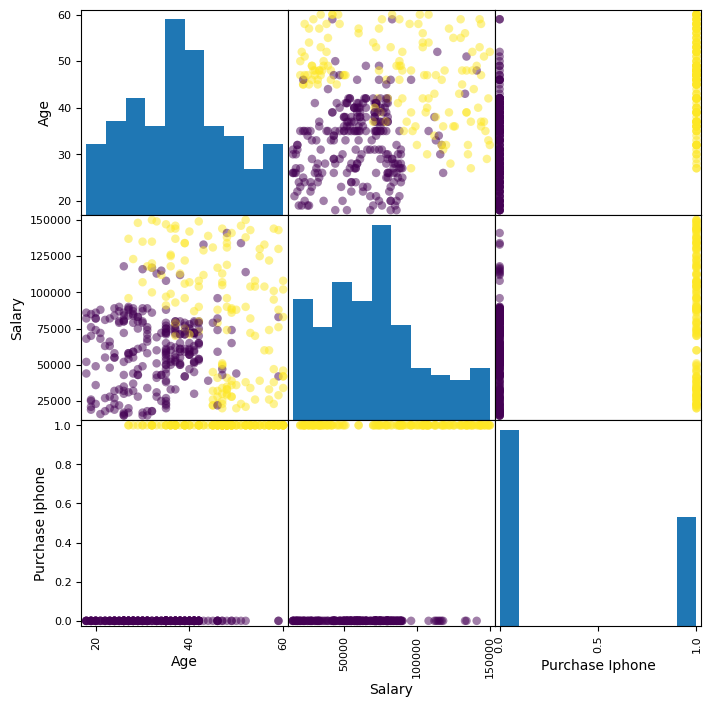

In [ ]:
pd.plotting.scatter_matrix(dataset, c=Y, figsize=[8,8], s=150)

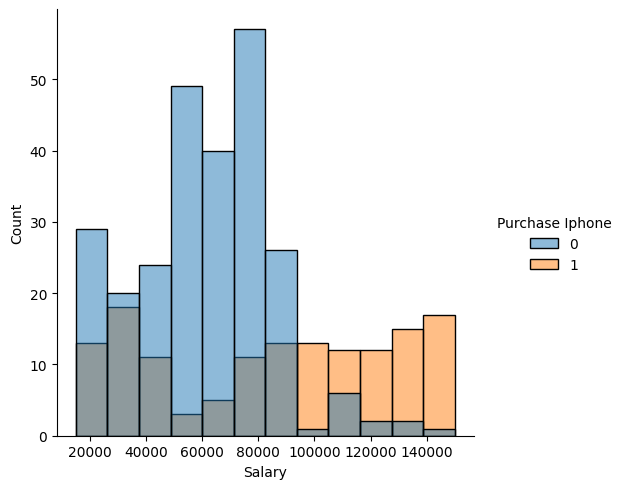

In [3]:
sns.displot(dataset, x='Salary', hue='Purchase Iphone')

**Split data into training and test set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=18, stratify=Y)

**Make predictions using KNN algorithm**

Text(0, 0.5, 'accuracy')

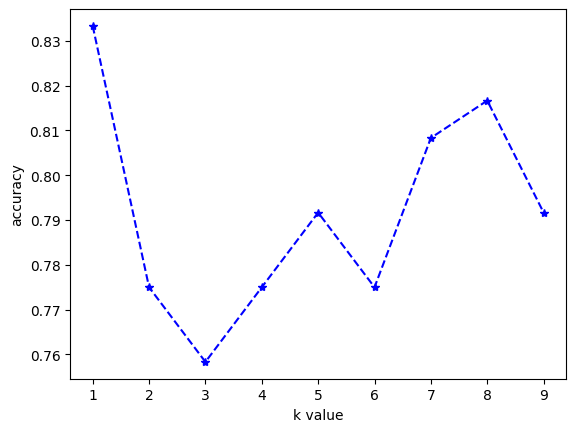

In [ ]:
accuracy=[]
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
  Y_pred = knn.predict(X_test)
  accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
plt.plot(range(1,10),accuracy, color='blue', linestyle='dashed', marker='*')
plt.xlabel('k value')
plt.ylabel('accuracy')

**Check Accuracy of the Predictions**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=8).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.8166666666666667